Naive Bayes

Naive Bayes는 텍스트 데이터를 사용할 때 전통적으로 사용되는 기법이다. 이는 베이즈 정리를 기반으로 두고 있다. 베이즈 정리부터 간단히 알아보자. 

-확률의 공리에 관하여 

In [1]:
from IPython.display import Image

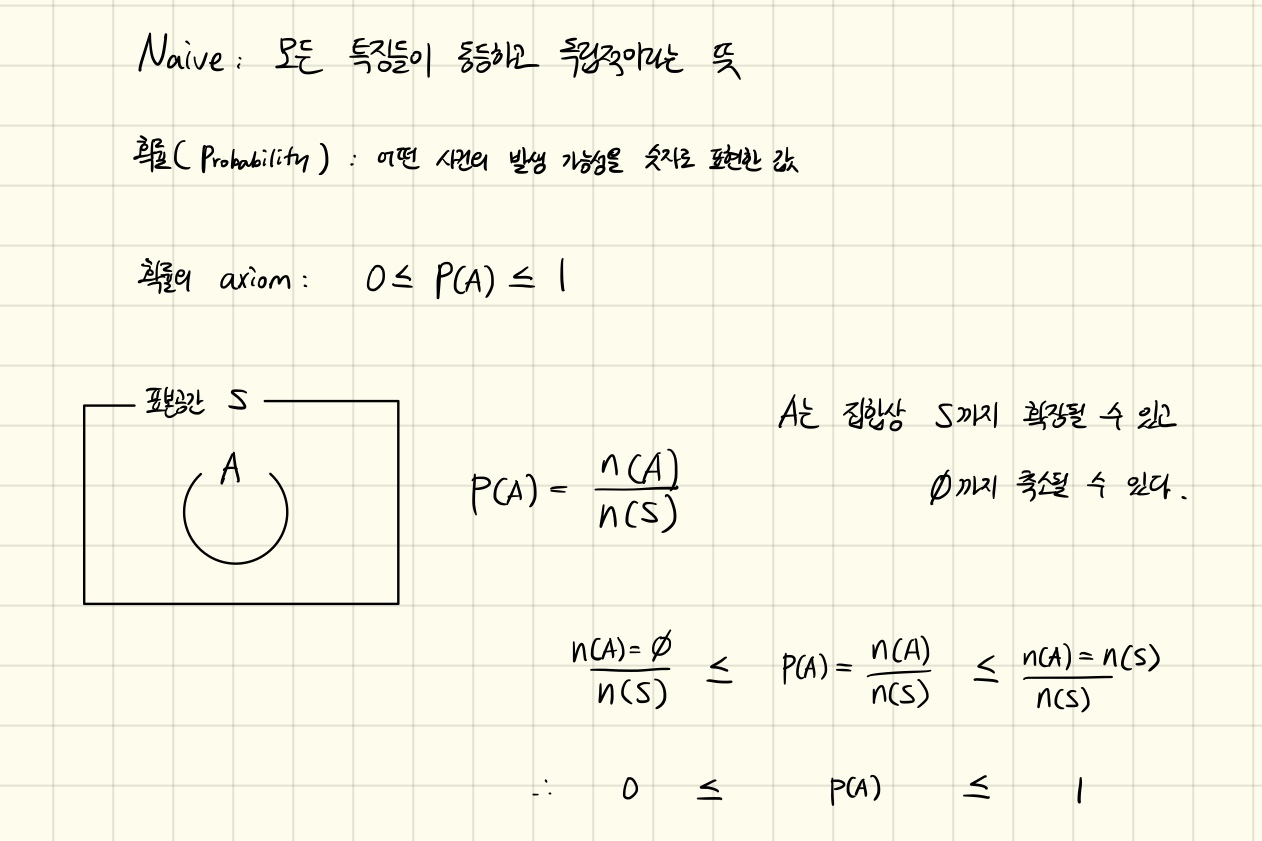

In [4]:
Image('C:/Users/juhyj/Desktop/prob_axiom.jpg')

이번엔 조건부 확률에 대해 알아보자.

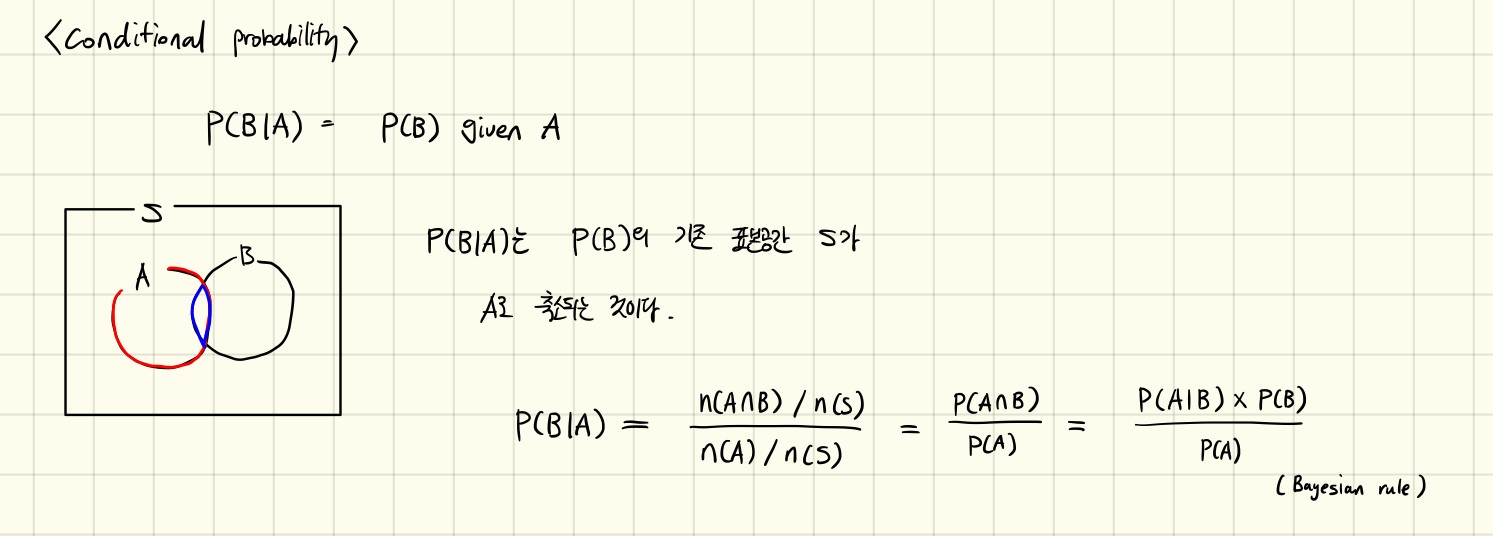

In [5]:
Image('C:/Users/juhyj/Desktop/Bayes_theorem.jpg')

T를 입력 문서(text), C를 분류할 class 중 하나라고 생각하면 텍스트 데이터가 주어졌을 때, class 중 하나에 속할 확률을 아래와 같이 표시할 수 있다.

$$
\begin{equation} 
P(C|T) = \frac{P(T|C)P(C)}{P(T)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$

class가 여러개일 경우 각각의 class에 대한 조건부 확률을 계산할 수 있고, 가장 높은 확률을 가지는 class가 해당 문서가 속할 class가 되게 된다. 이를 식으로 표현하면 다음과 같다.

$$
\begin{align}
C_{selected} & = argmax_{C}P(C|T) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
 \\
& = argmax_{C}\frac{P(T|C)P(C)}{P(T)} \\
 \\
& = argmax_{C}P(T|C)P(C)
\end{align}
$$

위 식에서 P(T)는 계속 고정값이기 때문에 생략해도 된다. 그래서 생략한 식이 최종 식이다.

여기서 텍스트 T가 각각 "독립적인" 단어 t로 이루어져 있다고 가정하자.

$$
\begin{align} 
C_{selected} & = argmax_{C}P(t_{1}, \ t_{2},\ldots, \ t_{n}|C)P(C) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
 \\
& = argmax_{C}P(t_{1}|C)P(t_{2}|C)\cdots P(t_{n}|C)P(C) 
 \\
& = argmax_{C}\prod_{i=1}^{n}P(t_{i}|C)P(C)
\end{align}
$$

결국 클래스 C의 단어들 중 단어 t가 나타날 확률을 텍스트 중에서 클래스 C의 단어들이 나타날 확률로 나눠주는 것이다.

$$
\begin{align} 
\hat{P}(t_{i}|C = c) & = \frac{word \ count(t_{i},c)}{\sum_{t_{i} \in T}word \ count(t_{i},c)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
\end{align}
$$

$$
\begin{align} 
\hat{P}(C) & = \frac{text \ count(C=c)}{N_{text}} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
\end{align}
$$

* 라플라스 스무딩 기법(Laplace Smoothing)

하지만 만약 기존 문서에 없는 새로운 단어라면 클래스 C의 단어들 중 단어 t가 나타날 확률이 0이 되면서 결과값이 0이 나올것이다. 이 기법은 새로운 단어가 나오면 확률이 0이 되는 것을 막기 위해 해당 빈도에 인위적으로 1을 더해줌으로써 이러한 사태를 막는다.

$$
\begin{align} 
\hat{P}(t_{i}|C = c) & = \frac{word \ count(t_{i},c)+1}{\sum_{t_{i} \in T}(word \ count(t_{i},c)+1)} 
= \frac{word \ count(t_{i},c)+1}{\sum_{t_{i} \in T}word \ count(t_{i},c)+|T|} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
\end{align}
$$

News Dataset

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [10]:
from sklearn.datasets import fetch_20newsgroups

In [11]:
news = fetch_20newsgroups()

In [12]:
X, Y, labels = news.data, news.target, news.target_names

In [13]:
X[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [14]:
len(Y)

11314

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [21]:
# 데이터 전처리(벡터화)
vectorizer = CountVectorizer()
tfid = TfidfTransformer()

In [22]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [23]:
X_train_tfid = tfid.fit_transform(X_train_vec)
X_test_tfid = tfid.transform(X_test_vec)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [25]:
# (다중분류) 나이브 베이즈, 그리드서치로 모델 학습
nb = MultinomialNB()
param_grid = [{'alpha': np.linspace(0.01, 1, 100)}]
gs = GridSearchCV(estimator=nb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train_tfid, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid=[{'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])}],
             scoring='accuracy')

In [26]:
print('best hyperparameter: {0}'.format(gs.best_params_))
print('accuracy: {0:.2f}'.format(gs.best_score_))

best hyperparameter: {'alpha': 0.01}
accuracy: 0.90


In [27]:
# 나이브 베이즈 모형 생성
naive_bayes_m = gs.best_estimator_

In [28]:
Y_predict = naive_bayes_m.predict(X_test_tfid)
print(Y_predict)

[12  7 15 ...  9  4 13]


In [29]:
# Test dataset accuracy
accuracy_test = naive_bayes_m.score(X_test_tfid, Y_test)
print('Test dataset Accuracy: {0:.2f}'.format(accuracy_test))

Test dataset Accuracy: 0.90


In [30]:
# 실제값과 예측값 비교
Y_predict = naive_bayes_m.predict(X_test_tfid)
for i in range(10):
    print('Actual: {0} || Predicted: {1}'.format(labels[Y_test[i]], labels[Y_predict[i]]))

Actual: comp.sys.ibm.pc.hardware || Predicted: sci.electronics
Actual: rec.autos || Predicted: rec.autos
Actual: soc.religion.christian || Predicted: soc.religion.christian
Actual: talk.politics.mideast || Predicted: talk.politics.mideast
Actual: sci.electronics || Predicted: sci.electronics
Actual: comp.sys.ibm.pc.hardware || Predicted: comp.sys.ibm.pc.hardware
Actual: talk.politics.guns || Predicted: talk.politics.guns
Actual: rec.motorcycles || Predicted: rec.motorcycles
Actual: sci.crypt || Predicted: sci.crypt
Actual: sci.crypt || Predicted: sci.crypt
